# Regression Analysis
Predicting another variable on the basis of other variables

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv'
df = pd.read_csv(path)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [4]:
df

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1,95,volvo,std,four,sedan,rwd,front,109.1,0.907256,...,9.5,114.0,5400.0,23,28,16845.0,10.217391,Medium,0,1
197,-1,95,volvo,turbo,four,sedan,rwd,front,109.1,0.907256,...,8.7,160.0,5300.0,19,25,19045.0,12.368421,High,0,1
198,-1,95,volvo,std,four,sedan,rwd,front,109.1,0.907256,...,8.8,134.0,5500.0,18,23,21485.0,13.055556,Medium,0,1
199,-1,95,volvo,turbo,four,sedan,rwd,front,109.1,0.907256,...,23.0,106.0,4800.0,26,27,22470.0,9.038462,Medium,1,0


# Simple Linear Regression
This helps us understand the relationship between two variables
- Predictor/independent variable (X)
- Response/dependent variable (Y)

Yhat = a + bX
- a and b can be determined using sklearn

In [4]:
from sklearn.linear_model import LinearRegression

how highway-mpg (independent) can help us predict car price (dependent)

In [67]:
X = df[['highway-mpg']]
Y = df['price']  # Y value should not be in dataframe like X because you would want the predicted outcome to be one array

Creating a linear regression object and fitting the model using the X and Y variables

In [8]:
lm = LinearRegression()
lm.fit(X,Y)

LinearRegression()

Printing out prediction result (X is the indepdent variable and Y is the outcome)

In [9]:
Yhat=lm.predict(X)
Yhat[0:5]   

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

We can also figure out `a` (regression line intercept) and `b` (slope of the regression line)

In [10]:
lm.intercept_

38423.305858157386

In [11]:
lm.coef_

array([-821.73337832])

$$
Yhat = a + b  X
$$
We get the final linear model of
- <b>Price</b> = 38423.31 - 821.73 x <b>highway-mpg</b>

# Multiple Linear Regression
- using multiple independent variables to predict one dependent variable.

The equation is given

$$
Yhat = a + b\_1 X\_1 + b\_2 X\_2 + b\_3 X\_3 + b\_4 X\_4
$$

Lets use these variables as a predictor (independent variables)

In [68]:
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

In [69]:
lm.fit(Z, df['price']) 

LinearRegression()

In [70]:
Y_hat=lm.predict(Z)
Y_hat[0:5]

array([13699.11161184, 13699.11161184, 19051.65470233, 10620.36193015,
       15521.31420211])

In [15]:
lm.intercept_

-15806.624626329198

In [16]:
lm.coef_

array([53.49574423,  4.70770099, 81.53026382, 36.05748882])

We get final linear model of

- <b>Price</b> = -15678.742628061467 + 52.65851272 x <b>horsepower</b> + 4.69878948 x <b>curb-weight</b> + 81.95906216 x <b>engine-size</b> + 33.58258185 x <b>highway-mpg</b>

# Regression Plot
- It is used to visualize simple linear regression

Visualing highway-mpg as predictor (independent variable) of price

In [17]:
import seaborn as sns
%matplotlib inline 

(0.0, 48161.03134790009)

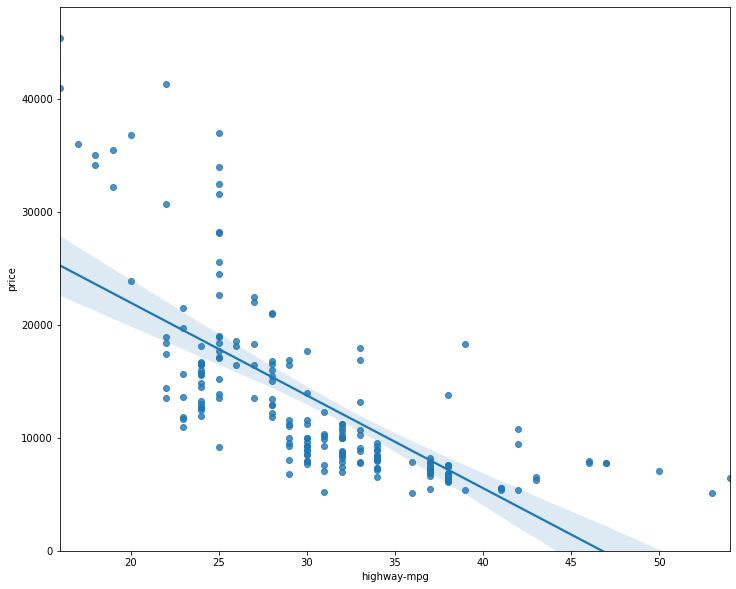

In [21]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)

As you can see from the graph, price is negarively correlated to highway-mpg

# Residual Plot
This plot shows if my linear model is appropriate 
- Good way to visualize the variance of the data
- Residual = difference between actual value and predicted value.


If the points are <b>randomly spread out around the x-axis</b> then the model is appropriate because it means that the variance is constant


C:\Users\bkim5\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


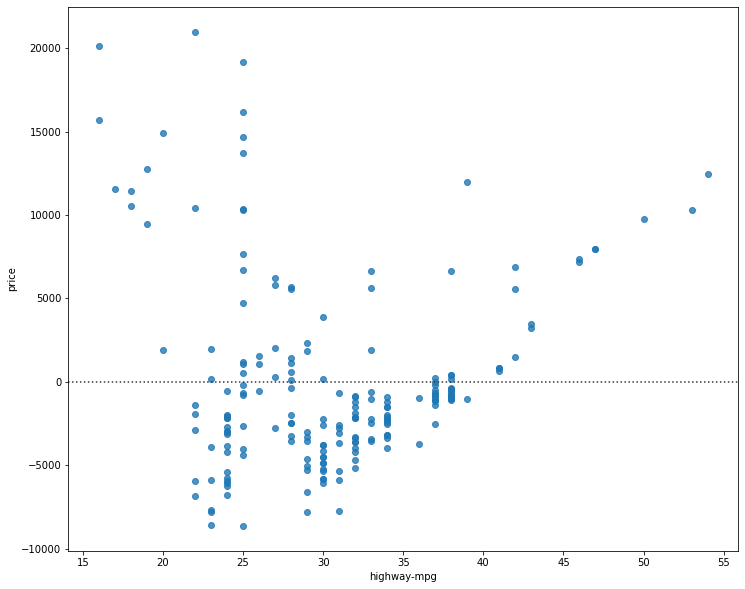

In [22]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(df['highway-mpg'], df['price'])
plt.show()

This plot tells us that residual points are not randomly spread around x-axis so, it is leading us to believe that non-linear model is more appropriate 

# Distribution plot
- Can visually see the distribution of the predicted values and actual values.
- It is also used to visualize a model for Multiple Linear Regression

Going back to our Multiple Linear Regression prediction

In [29]:
Z

,horsepower,curb-weight,engine-size,highway-mpg
0,111.0,2548,130,27
1,111.0,2548,130,27
2,154.0,2823,152,26
3,102.0,2337,109,30
4,115.0,2824,136,22
...,...,...,...,...
196,114.0,2952,141,28
197,160.0,3049,141,25
198,134.0,3012,173,23
199,106.0,3217,145,27


In [25]:
Y_hat=lm.predict(Z)
Y_hat[0:5]

array([13699.11161184, 13699.11161184, 19051.65470233, 10620.36193015,
       15521.31420211])

C:\Users\bkim5\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\bkim5\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


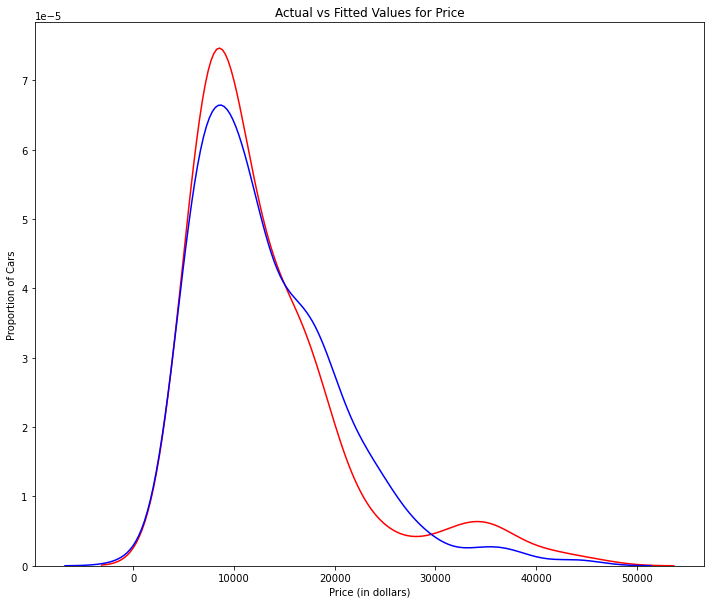

In [26]:
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

We can see that the predicted values are close to actual values since they overlap a bit but not accurate when prices increase

# Polynomial Regression
- Useful for describing curvilinear relationship.


Different orders of polynomial regression:
<center><b>Quadratic - 2nd Order</b></center>
$$
Yhat = a + b_1 X +b_2 X^2 
$$



<center><b>Cubic - 3rd Order</b></center>
$$
Yhat = a + b_1 X +b_2 X^2 +b_3 X^3\\\\
$$

<center><b>Higher-Order</b>:</center>
$$
Y = a + b_1 X +b_2 X^2 +b_3 X^3 ....\\\\
$$

Creating a function to plot polynomial function

In [31]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

Getting variables

In [32]:
x = df['highway-mpg']
y = df['price']

Let's fit the polynomial using the function <b>polyfit</b>, then use the function <b>poly1d</b> to display the polynomial function.

In [33]:
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


In [34]:
print(f)

[-1.55663829e+00  2.04754306e+02 -8.96543312e+03  1.37923594e+05]


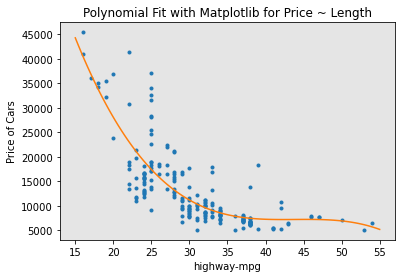

In [35]:
PlotPolly(p, x, y, 'highway-mpg')

This polynomial model performs better than the linear model because the polynomial function 'hits' more data points

# Multivariate Polynomial function
$$
Yhat = a + b\_1 X\_1 +b\_2 X\_2 +b\_3 X\_1 X\_2+b\_4 X\_1^2+b\_5 X\_2^2
$$

To perform polynomial transform, we use PolynomialFeatures

In [42]:
from sklearn.preprocessing import PolynomialFeatures
pr=PolynomialFeatures(degree=2)
Z_pr=pr.fit_transform(Z)
Z_pr.shape

(201, 15)

Before the transformation

In [43]:
Z.shape

(201, 4)

# Pipeline
- Pipeline simplify the steps of processing data.
- Data goes into pipeline, performs the tasks in order and, gives result.

In [46]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [48]:
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]

Inputing the list into the Pipeline constructor

In [49]:
pipe=Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

We then convert Z into float to avoid error and fit the datas into the pipe

In [50]:
Z = Z.astype(float)
pipe.fit(Z,y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

After fitting, we can predict our value by entering our independent variables (Z)

In [51]:
ypipe=pipe.predict(Z)
ypipe[0:4]

array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555])

# Determining the accuracy of our model
- R^2: explains the percentage variation of the indepdent variable (Y) and shows how close the data points is to the regression line.
    - Higher the R^2 value, more accurate our model is
- MSE: Difference between actual value and predicted value then squaring.
    - Lesser the value, more accurate/efficient our model is
    - Large MSE means that my data values are dispersed widely around the mean value

Calculating the R^2 of highway-mpg fit

In [53]:
lm.fit(X, Y)
print('The R-square is: ', lm.score(X, Y))

The R-square is:  0.4965911884339175


### ~49.659% of the variation of the price is explained by this model

First, we predict the output (Yhat) using the predict method where (X) is the input variable

In [54]:
Yhat=lm.predict(X)
print('The output of the first four predicted value is: ', Yhat[0:4])

The output of the first four predicted value is:  [16236.50464347 16236.50464347 17058.23802179 13771.3045085 ]


After we get our `predicted` result, we now compare with the `actual` result

In [56]:
from sklearn.metrics import mean_squared_error

In [57]:
mse = mean_squared_error(df['price'], Yhat)
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  31635042.944639895


- Compare MSE with different models to see which value is the lowest.
    - single linear, multiple, poly, etc..

### Finding the scores of a polynomial fit

In [61]:
from sklearn.metrics import r2_score

Using our earlier polynomial equation

In [62]:
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


Finding the R^2 value

In [63]:
r_squared = r2_score(y, p(x))
print('The R-square value is: ', r_squared)

The R-square value is:  0.674194666390652


Finding the MSE

In [66]:
mean_squared_error(y, p(x))

20474146.426361218

# Conclusion
In order to create the best model you,
- Visualize different models
- Generate R^2 and MSE values for each fits
- Compare each R^2 and MSE to find the best fit